# Modular Solver Test


In [1]:
import sys, os
neural_dir = r"C:\neuralOperator\solvers"
sys.path.append(neural_dir)
from solvers import *

import numpy as np
import matplotlib.pyplot as plt


solvers file:	c:\neuralOperator\solvers\solvers.py
Library directory:	C:\neuralOperator\solvers\lib
Before import from distributedFunctions
After import from distributedFunctions


## Introduction

Part of our neural operator project was producing a modular solver that does not inherently require the standard or Euclidean spatial discretization to operate. Thus, I will be working through a Burger's equation problem to show how the new solver works.



## Problem Setup

To set up the problem, we will have an x-domain from [-1, 1] with a dual-sine initialized state.


In [2]:
N_x = 1000
x_domain = np.linspace(-1, 1, N_x)


In [3]:
u_0 = np.sin( 2* np.pi * x_domain ) - 2 * np.sin( np.pi * x_domain )


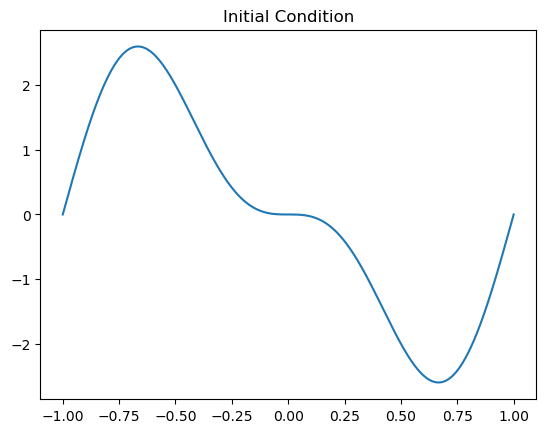

In [4]:
plt.plot( x_domain, u_0 )

plt.title("Initial Condition")
plt.show()


# Burger's Equation Object

Part of how the solver is set up is to let the Burger's equation as an object. We initialize it and then we can call it, which allows the time stepping object to use an object specific to a problem.


In [5]:
burgers_test = burgers_eqn( viscid=False )


Spatial order is 2
 
 
 
 
 
 
 
 
 


In [6]:
BC_set = ( [0, None], [None, None] )

In [7]:
du_dt_0 = burgers_test( x_domain, u_0, [0] , BC_set)


c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_base.py:1068: SparseEfficiencyWarning: Constructing a DIA matrix with 1002 diagonals is inefficient
  return self.tocoo(copy=copy).todia(copy=False)


With that, let's see what our time gradient looks like.


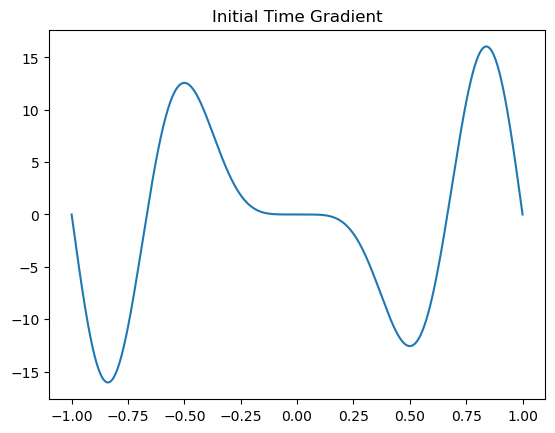

In [8]:
plt.plot( x_domain, du_dt_0 )

plt.title("Initial Time Gradient")
plt.show()


And this looks right for the initial condition we have.


## Time Stepping

Now, we can introduce our equation object to the time stepping object.


In [9]:
stepper_test = explicitEuler( burgers_test, x_domain, u_0, (0, 0.5), 10e-6, [0], BC_set )


In [10]:
stepper_test.solve()


Time: 0
	Maximum Courant Number: 0.012977269062816713
Time: 1e-05
	Maximum Courant Number: 0.012977275537639115
Time: 2e-05
	Maximum Courant Number: 0.012977281839896004
Time: 3.0000000000000004e-05
	Maximum Courant Number: 0.01297728796957834
Time: 4e-05
	Maximum Courant Number: 0.01297729392667713
Time: 5e-05
	Maximum Courant Number: 0.0129772997111834
Time: 6e-05
	Maximum Courant Number: 0.01297730532308821
Time: 7.000000000000001e-05
	Maximum Courant Number: 0.012977310762382656
Time: 8e-05
	Maximum Courant Number: 0.012977316029057858
Time: 9e-05
	Maximum Courant Number: 0.012977321123104969
Time: 0.0001
	Maximum Courant Number: 0.012977326044515175
Time: 0.00011
	Maximum Courant Number: 0.012977330793279692
Time: 0.00012
	Maximum Courant Number: 0.012977335369389763
Time: 0.00013000000000000002
	Maximum Courant Number: 0.012977339772836669
Time: 0.00014000000000000001
	Maximum Courant Number: 0.012977344003611717
Time: 0.00015000000000000001
	Maximum Courant Number: 0.01297734806

C:\neuralOperator\solvers\lib\equation.py:297: RuntimeWarning: overflow encountered in multiply
  cls.f = u*u/2


	Maximum Courant Number: nan
Time: 0.31140000000017065
	Maximum Courant Number: nan
Time: 0.31141000000017066
	Maximum Courant Number: nan
Time: 0.31142000000017067
	Maximum Courant Number: nan
Time: 0.3114300000001707
	Maximum Courant Number: nan
Time: 0.3114400000001707
	Maximum Courant Number: nan
Time: 0.3114500000001707
	Maximum Courant Number: nan
Time: 0.3114600000001707
	Maximum Courant Number: nan
Time: 0.3114700000001707
	Maximum Courant Number: nan
Time: 0.31148000000017073
	Maximum Courant Number: nan
Time: 0.31149000000017074
	Maximum Courant Number: nan
Time: 0.31150000000017075
	Maximum Courant Number: nan
Time: 0.31151000000017076
	Maximum Courant Number: nan
Time: 0.31152000000017077
	Maximum Courant Number: nan
Time: 0.3115300000001708
	Maximum Courant Number: nan
Time: 0.3115400000001708
	Maximum Courant Number: nan
Time: 0.3115500000001708
	Maximum Courant Number: nan
Time: 0.3115600000001708
	Maximum Courant Number: nan
Time: 0.3115700000001708
	Maximum Courant Num

In [11]:
stepper_test.u


array([[ 4.89858720e-16,  2.51574845e-02,  5.03124811e-02, ...,
        -5.03124811e-02, -2.51574845e-02, -4.89858720e-16],
       [ 4.89858720e-16,  2.51543235e-02,  5.03061603e-02, ...,
        -5.03061603e-02, -2.51543235e-02,  3.12622208e-10],
       [ 4.89858720e-16,  2.51511632e-02,  5.02998411e-02, ...,
        -5.02998411e-02, -2.51511632e-02,  6.25048531e-10],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

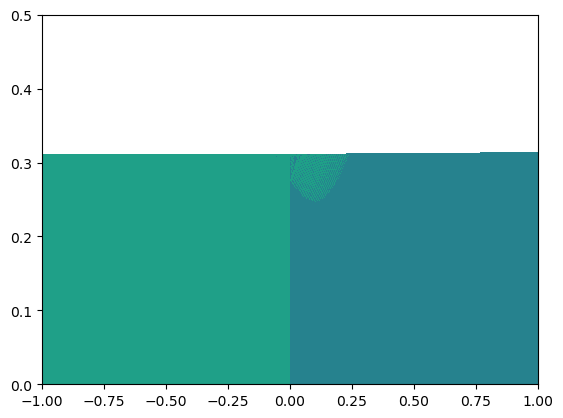

In [12]:
plt.contourf( x_domain, stepper_test.t, stepper_test.u )
